# Finnt - EDA and Data Cleaning

**Exploratory Data Analysis for Personalized Loan Offer Engine**

This notebook performs comprehensive EDA on the Lending Club loan dataset to understand:
1. Data structure and quality
2. Target variable distributions for our dual-model approach:
   - **P(Default)**: Probability of loan default
   - **P(Acceptance)**: Probability of customer accepting an offer
3. Feature characteristics and distributions
4. Missing data patterns

**Date**: July 8, 2025  
**Phase**: 1 - Data Exploration

## 1. Environment Setup

Import essential libraries for data analysis and visualization.

In [3]:
# Core data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print(" Libraries loaded successfully!")
print(f" Pandas version: {pd.__version__}")
print(f" Matplotlib version: {plt.matplotlib.__version__}")

 Libraries loaded successfully!
 Pandas version: 2.3.1
 Matplotlib version: 3.9.4


## 2. Data Loading

Load the Lending Club loan dataset from our DVC-tracked data directory.

In [4]:
# Load the dataset
data_path = '../data/raw/loan.csv'
print(f"Loading dataset from: {data_path}")

# Read the CSV file
df = pd.read_csv(data_path, low_memory=False)

print(f" Dataset loaded successfully!")
print(f" Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f" Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

Loading dataset from: ../data/raw/loan.csv
 Dataset loaded successfully!
 Dataset shape: 2,260,668 rows × 145 columns
 Dataset loaded successfully!
 Dataset shape: 2,260,668 rows × 145 columns
 Memory usage: 5942.3 MB
 Memory usage: 5942.3 MB


## 3. Initial Data Inspection

Get a high-level overview of the dataset structure, data types, and basic statistics.

In [5]:
# Dataset information
print("DATASET INFORMATION")
print("=" * 50)
df.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [6]:
# First few rows
print("FIRST 5 ROWS")
print("=" * 50)
display(df.head())

FIRST 5 ROWS


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [7]:
# Statistical summary (transposed for better readability)
print("STATISTICAL SUMMARY (Numeric Features)")
print("=" * 50)
numeric_summary = df.describe().T
display(numeric_summary)

STATISTICAL SUMMARY (Numeric Features)


,count,mean,std,min,25%,50%,75%,max
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,500.00,8000.00,12900.000,20000.0000,40000.00
funded_amnt,2260668.0,15041.664057,9188.413022,500.00,8000.00,12875.000,20000.0000,40000.00
funded_amnt_inv,2260668.0,15023.437624,9192.331807,0.00,8000.00,12800.000,20000.0000,40000.00
...,...,...,...,...,...,...,...,...
hardship_payoff_balance_amount,10613.0,11628.036442,7615.161123,55.73,5628.73,10044.220,16114.9400,40306.41
hardship_last_payment_amount,10613.0,193.606331,198.694368,0.01,43.78,132.890,284.1800,1407.86
settlement_amount,33056.0,5030.606922,3692.027842,44.21,2227.00,4172.855,6870.7825,33601.00
settlement_percentage,33056.0,47.775600,7.336379,0.20,45.00,45.000,50.0000,521.35


## 4. Target Variable Analysis: Loan Status

**Critical Analysis**: The `loan_status` column is our primary target variable that we'll use to derive two separate prediction targets:

1. **P(Default)**: Binary classification of whether a loan defaults
2. **P(Acceptance)**: Will be derived from customer behavior data (separate dataset/feature engineering)

Let's analyze the distribution of loan statuses to understand our default definition.

In [8]:
# Analyze loan_status distribution
print("LOAN STATUS DISTRIBUTION")
print("=" * 50)

status_counts = df['loan_status'].value_counts()
status_pct = df['loan_status'].value_counts(normalize=True) * 100

status_summary = pd.DataFrame({
    'Count': status_counts,
    'Percentage': status_pct
})

print(status_summary)
print(f"\nTotal unique loan statuses: {df['loan_status'].nunique()}")

LOAN STATUS DISTRIBUTION
                                                      Count  Percentage
loan_status                                                            
Fully Paid                                          1041952   46.090448
Current                                              919695   40.682444
Charged Off                                          261655   11.574234
Late (31-120 days)                                    21897    0.968608
In Grace Period                                        8952    0.395989
Late (16-30 days)                                      3737    0.165305
Does not meet the credit policy. Status:Fully Paid     1988    0.087939
Does not meet the credit policy. Status:Charged...      761    0.033663
Default                                                  31    0.001371

Total unique loan statuses: 9


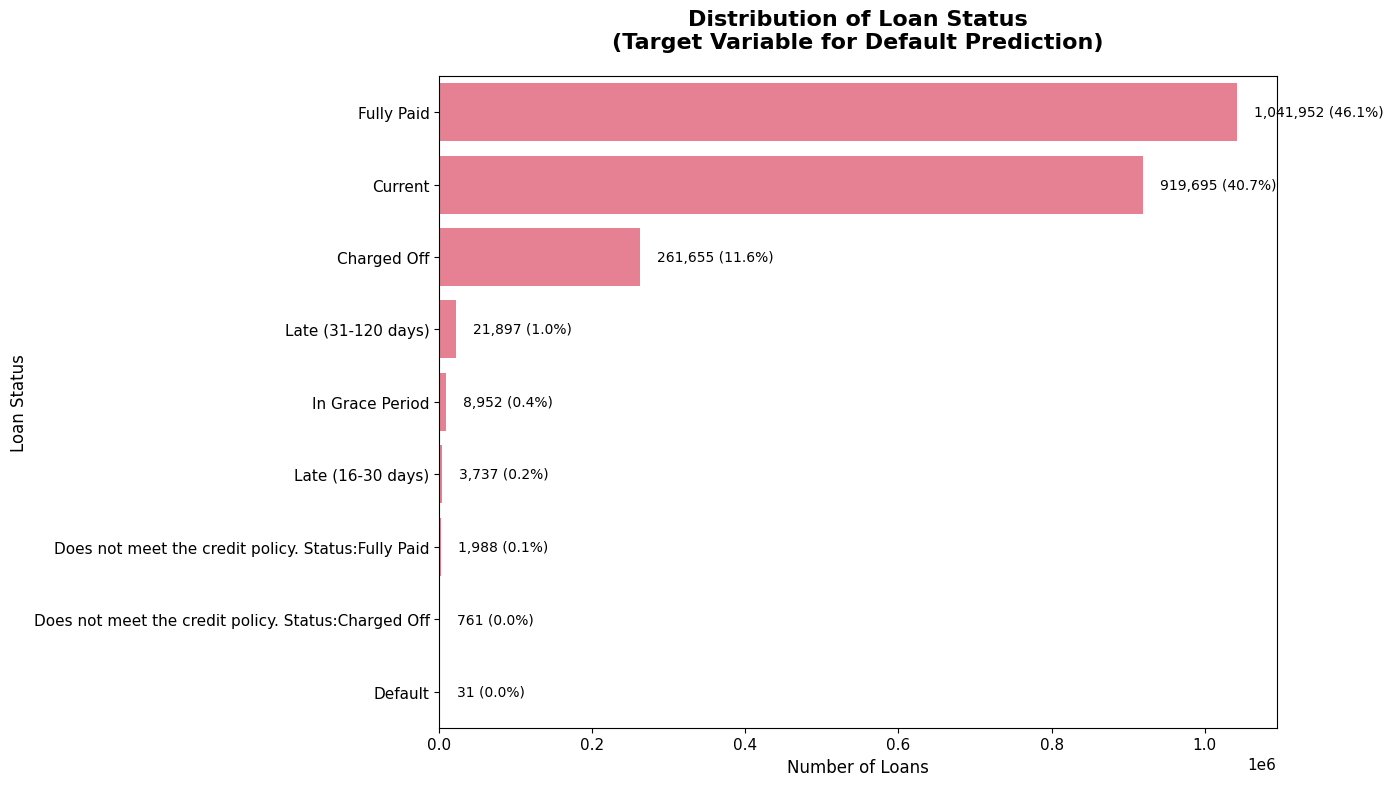

In [9]:
# Visualize loan status distribution
plt.figure(figsize=(14, 8))

# Create bar plot
ax = sns.countplot(data=df, y='loan_status', order=status_counts.index)
plt.title('Distribution of Loan Status\n(Target Variable for Default Prediction)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Loans', fontsize=12)
plt.ylabel('Loan Status', fontsize=12)

# Add percentage labels
total = len(df)
for i, p in enumerate(ax.patches):
    percentage = f'{100 * p.get_width() / total:.1f}%'
    ax.annotate(f'{int(p.get_width()):,} ({percentage})', 
                (p.get_width() + total * 0.01, p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

BINARY DEFAULT TARGET ANALYSIS
Overall Default Rate: 12.71%
Non-Default Rate: 87.29%

Class Distribution:
is_default
0    1973348
1     287320
Name: count, dtype: int64


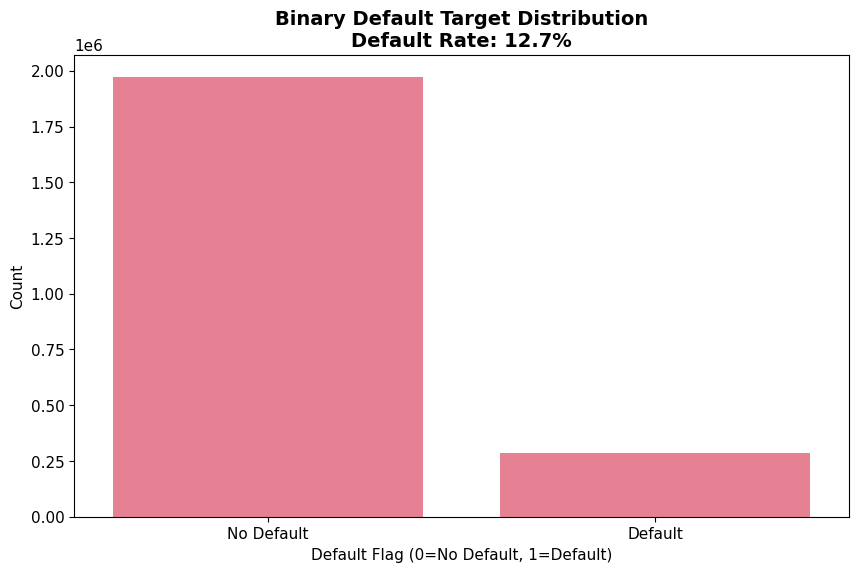

In [10]:
# Create binary default target variable
default_statuses = ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)']
df['is_default'] = df['loan_status'].isin(default_statuses).astype(int)

# Analyze default rate
default_rate = df['is_default'].mean() * 100
print(f"BINARY DEFAULT TARGET ANALYSIS")
print("=" * 50)
print(f"Overall Default Rate: {default_rate:.2f}%")
print(f"Non-Default Rate: {100-default_rate:.2f}%")
print(f"\nClass Distribution:")
print(df['is_default'].value_counts())

# Visualize binary target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='is_default')
plt.title(f'Binary Default Target Distribution\nDefault Rate: {default_rate:.1f}%', 
          fontsize=14, fontweight='bold')
plt.xlabel('Default Flag (0=No Default, 1=Default)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

## 5. Missing Value Analysis

Identify columns with missing data to inform our data cleaning strategy.

In [11]:
# Calculate missing value percentages
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100

# Create summary of missing values
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_pct
})

# Filter to columns with missing data and sort by percentage
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)

print(f"MISSING VALUE ANALYSIS")
print("=" * 50)
print(f"Columns with missing data: {len(missing_summary)} out of {len(df.columns)}")
print(f"\nTop 15 columns with most missing data:")
display(missing_summary.head(15))

MISSING VALUE ANALYSIS
Columns with missing data: 113 out of 146

Top 15 columns with most missing data:


,Missing_Count,Missing_Percentage
id,2260668,100.000000
url,2260668,100.000000
member_id,2260668,100.000000
orig_projected_additional_accrued_interest,2252242,99.627278
hardship_length,2250055,99.530537
hardship_reason,2250055,99.530537
hardship_status,2250055,99.530537
deferral_term,2250055,99.530537
hardship_amount,2250055,99.530537
hardship_start_date,2250055,99.530537


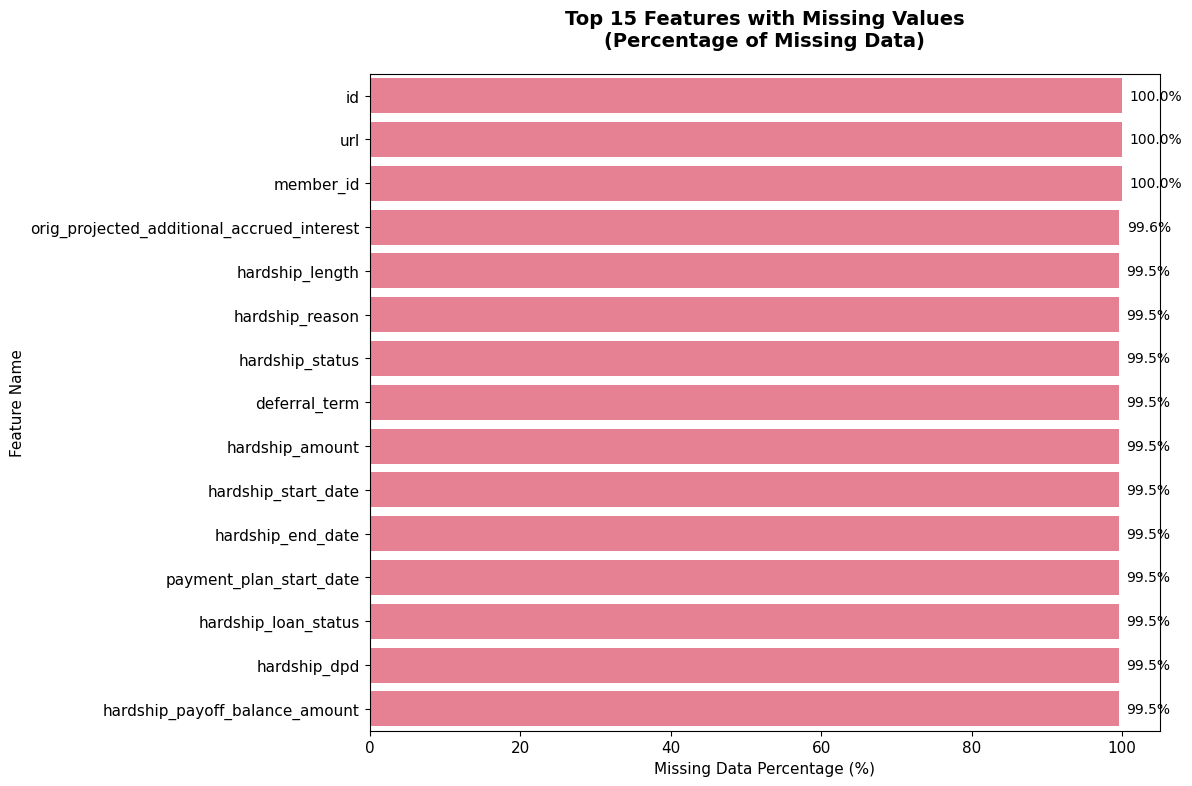


Dropping 39 columns with >80% missing data for initial modeling...
Remaining columns after drop: 107

💡 Data Quality Insights:
- 44 columns have >50% missing data
- 38 columns have >90% missing data
- 39 columns dropped (>80% missing data)
Remaining columns after drop: 107

💡 Data Quality Insights:
- 44 columns have >50% missing data
- 38 columns have >90% missing data
- 39 columns dropped (>80% missing data)


In [12]:
# Visualize missing data for top 15 columns
top_missing = missing_summary.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_missing.reset_index(), y='index', x='Missing_Percentage')
plt.title('Top 15 Features with Missing Values\n(Percentage of Missing Data)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Missing Data Percentage (%)')
plt.ylabel('Feature Name')

# Add percentage labels on bars
for i, (idx, row) in enumerate(top_missing.iterrows()):
    plt.text(row['Missing_Percentage'] + 1, i, f'{row["Missing_Percentage"]:.1f}%', 
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Drop columns with >80% missing data for initial modeling
drop_cols = missing_summary[missing_summary['Missing_Percentage'] > 80].index.tolist()
print(f"\nDropping {len(drop_cols)} columns with >80% missing data for initial modeling...")
df = df.drop(columns=drop_cols)
print(f"Remaining columns after drop: {df.shape[1]}")

print(f"\n💡 Data Quality Insights:")
print(f"- {len(missing_summary[missing_summary['Missing_Percentage'] > 50])} columns have >50% missing data")
print(f"- {len(missing_summary[missing_summary['Missing_Percentage'] > 90])} columns have >90% missing data")
print(f"- {len(drop_cols)} columns dropped (>80% missing data)")

## 6. Key Feature Distribution Analysis

Analyze the distribution of critical numeric features that will likely be important for our loan default and acceptance models.

In [13]:
# Define key features for analysis
key_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']

# Check if features exist in dataset
available_features = [feat for feat in key_features if feat in df.columns]
missing_features = [feat for feat in key_features if feat not in df.columns]

print(f"KEY FEATURE DISTRIBUTION ANALYSIS")
print("=" * 50)
print(f"Available features: {available_features}")
if missing_features:
    print(f"Missing features: {missing_features}")

# Display basic statistics for key features
if available_features:
    print(f"\nStatistical Summary:")
    display(df[available_features].describe())

KEY FEATURE DISTRIBUTION ANALYSIS
Available features: ['loan_amnt', 'int_rate', 'annual_inc', 'dti']

Statistical Summary:


,loan_amnt,int_rate,annual_inc,dti
count,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06
mean,1.504693e+04,1.309291e+01,7.799243e+04,1.882420e+01
std,9.190245e+03,4.832114e+00,1.126962e+05,1.418333e+01
min,5.000000e+02,5.310000e+00,0.000000e+00,-1.000000e+00
25%,8.000000e+03,9.490000e+00,4.600000e+04,1.189000e+01
50%,1.290000e+04,1.262000e+01,6.500000e+04,1.784000e+01
75%,2.000000e+04,1.599000e+01,9.300000e+04,2.449000e+01
max,4.000000e+04,3.099000e+01,1.100000e+08,9.990000e+02


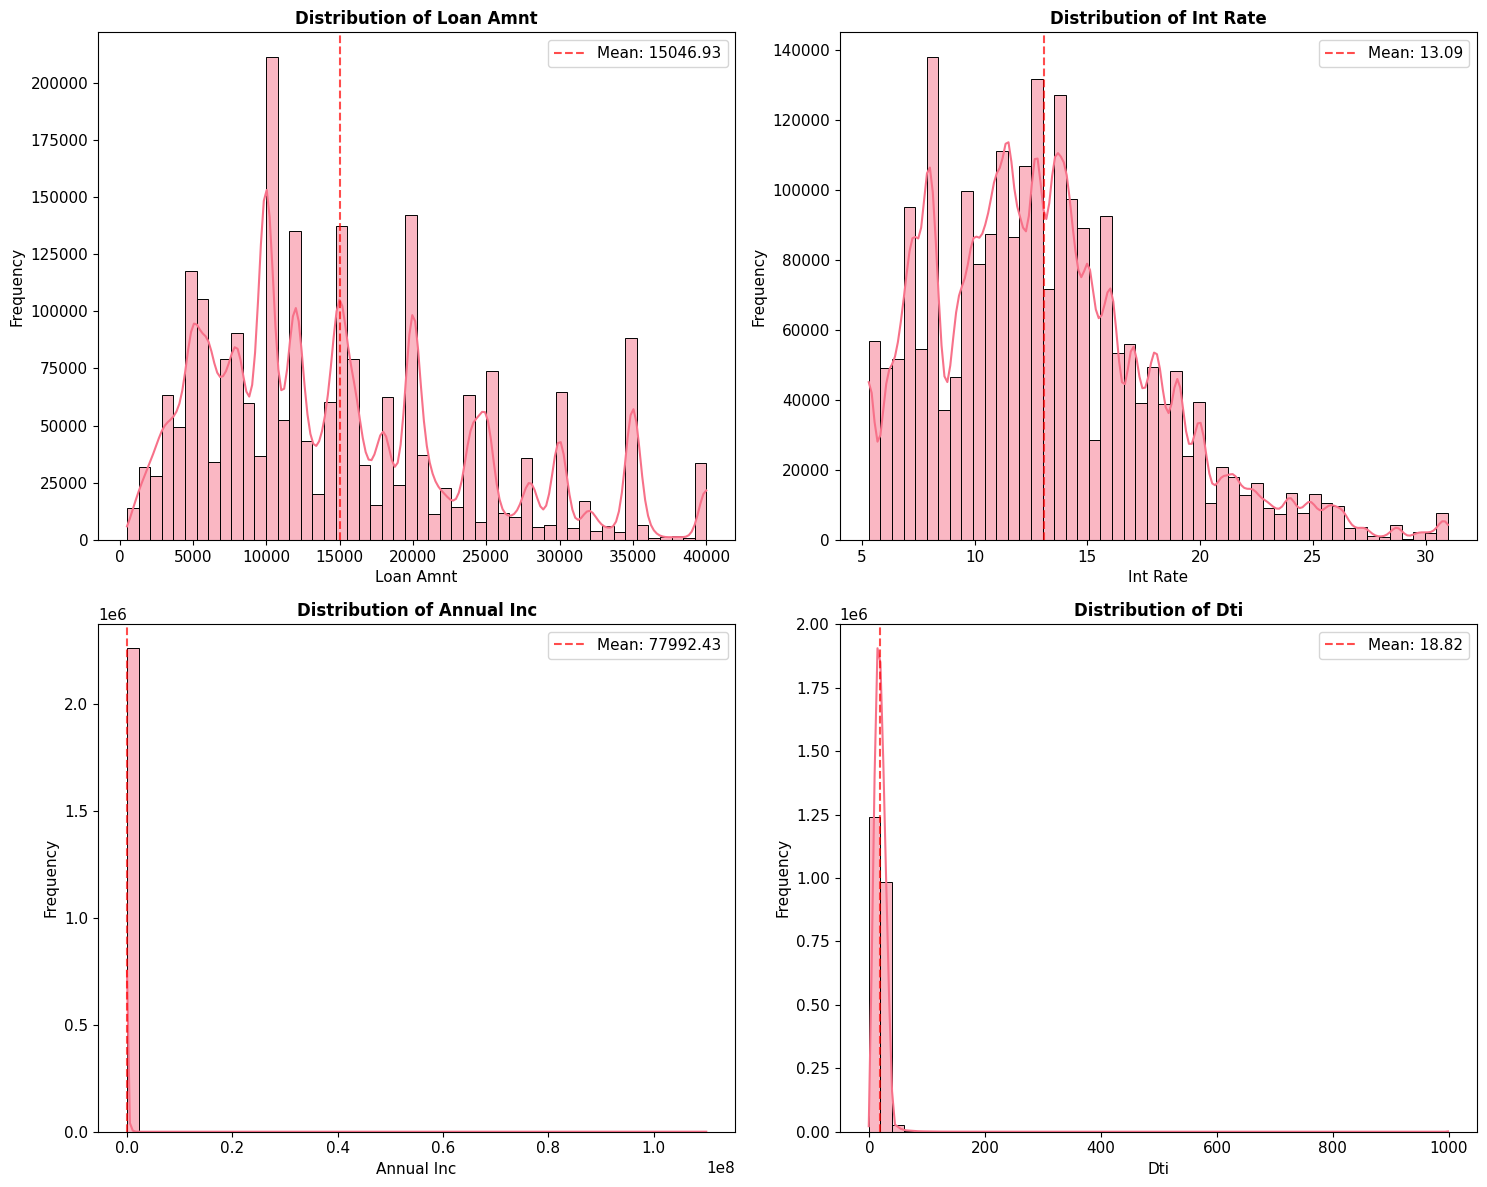

In [14]:
# Create distribution plots for key features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(available_features[:4]):
    if feature in df.columns:
        # Remove any missing values for plotting
        data = df[feature].dropna()
        
        # Create histogram with KDE
        sns.histplot(data, kde=True, ax=axes[i], bins=50)
        axes[i].set_title(f'Distribution of {feature.replace("_", " ").title()}', 
                         fontsize=12, fontweight='bold')
        axes[i].set_xlabel(feature.replace("_", " ").title())
        axes[i].set_ylabel('Frequency')
        
        # Add mean line
        mean_val = data.mean()
        axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, 
                       label=f'Mean: {mean_val:.2f}')
        axes[i].legend()

plt.tight_layout()
plt.show()

In [15]:
# Detailed analysis of one key feature: loan_amnt
if 'loan_amnt' in df.columns:
    loan_data = df['loan_amnt'].dropna()
    
    print(f"DETAILED ANALYSIS: LOAN AMOUNT")
    print("=" * 50)
    print(f"Mean loan amount: ${loan_data.mean():,.2f}")
    print(f"Median loan amount: ${loan_data.median():,.2f}")
    print(f"Standard deviation: ${loan_data.std():,.2f}")
    print(f"Minimum: ${loan_data.min():,.2f}")
    print(f"Maximum: ${loan_data.max():,.2f}")
    
    # Check for skewness
    from scipy import stats
    skewness = stats.skew(loan_data)
    print(f"\nDistribution characteristics:")
    print(f"Skewness: {skewness:.3f}")
    
    if abs(skewness) < 0.5:
        print("   → Distribution is approximately symmetric")
    elif abs(skewness) < 1:
        print("   → Distribution is moderately skewed")
    else:
        print("   → Distribution is highly skewed")
        
    if skewness > 0:
        print("   → Right-skewed (tail extends toward higher values)")
    else:
        print("   → Left-skewed (tail extends toward lower values)")
else:
    print("loan_amnt feature not found in dataset")

DETAILED ANALYSIS: LOAN AMOUNT
Mean loan amount: $15,046.93
Median loan amount: $12,900.00
Standard deviation: $9,190.25
Minimum: $500.00
Maximum: $40,000.00

Distribution characteristics:
Skewness: 0.778
   → Distribution is moderately skewed
   → Right-skewed (tail extends toward higher values)
